# Introduction

This Biodiversity in National Parks Project aims to analyze multiple data sources to determine patterns and relationships between species conservation status and their sightings at major national parks in the United States. 

This project will scope, analyze, plot, and evaluate the data to provide information necessary to answer the questions below:

1. What is the distribution of conservation status across species?
2. Are certain species more likely to face endangerment than others?
3. Is there a significant difference between species and their conservation status?
4. What animal, if any, appears to be closest to facing exctinction at this time? What is it's distribution across parks?
5. Is there an animal that is more prevelant than others? Does this prevelance differ across parks?
 
Upon answering these questions, this project will address potential issues with the data and findings, as well as open discussion for improvements and future questions that can be answered with further data collection and analysis.

### Data

Provided by [Codecademy.com](https://www.codecademy.com/)
1. observations.csv
2. species_info.csv

# Scope
The project scope serves as a roadmap to guide the project's progress and the reader's understanding of it's goals and findings. The scope of this project has been broken down into four sections:
1. **Goals** - Define project objectives, potential problems and the actions needed to achieve and overcome them respectfully.
2. **Data** - Identify data and if it is relevant to achieve project goals. Address any concerns for reliability or needs for further data to augment future research.
3. **Analysis** - Determine how data will be analyzed, including methods used and plans for validating analysis to answer questions. 
4. **Evaluation** - Review analysis to build conclusions and discuss findings. 

### Goals
The main objective of this project is to provide insights about endagered species to the National Parks Service to aid in their efforts for biodiversity conservation. Analyst objectives include understanding the characteristics of different species/animals and their conservation status and how that compares to their distribution across the different parks.

Questions this project aims to answer include:
1. What is the distribution of conservation status across species?
2. Are certain species more likely to face endangerment than others?
3. Is there a significant difference between species and their conservation status?
4. What animal, if any, appears to be closest to facing exctinction at this time? What is it's distribution across parks?
5. Is there an animal that is more prevelant than others? Does this prevelance differ across parks?

### Data
This project includes two provided datasets. The first, observations.csv, lists the number of observations of an animal (by it's scientific name) in each national park over the last 7 days. The second, species_info.csv, includes the conservation status of different animals, both their common and scientific names, and the species they belong to. 

### Analysis
Using descriptive summary statistics and visualization techniques, this section will explore the provided data to detect patterns, uncover relationships, and provide a better understanding of the data. Statistical inference will be used to determine if the values are statistically significant to support any final conclusions. 

Key metrics to compute include:
1. Counts
2. Distributions
3. Conservation status of each species
4. Relationships between species (if any)
5. Observations of species in each park

### Evaluation
This section will revisit original goals and questions and compare to the final analysis to determine if our findings support our original objectives. Final conclusions and reflections will be drafted here. In addition, any concerns over accuracy or potential for augmentation and future research will be addressed. 

# Import Modules

In [38]:
#import Python libraries and modules
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

#inline lead to static images of your plot embedded in the notebook, 
#notebook will lead to interactive plots (see below)
%matplotlib inline

# Load the Data

In [39]:
#load two provided datasets (csv) into dataframes
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')
print(obs.head(5))
print('\n')
print(species.head(5))

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domesti

In [40]:
#Data Characteristics
print(f'Observations: {obs.shape}, {obs.columns}')
print(f'Species: {species.shape}, {species.columns}')

Observations: (23296, 3), Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Species: (5824, 4), Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


# Explore the Data

In [41]:
#Species Dataframe
print(f"Number of Species: {species.category.nunique()}")
print(species.category.unique())
print(species.groupby('category').size())
print(f"Species Category na values:{species.category.isnull().sum()}")
print('\n')

print(f"Conservation Status: {species.conservation_status.nunique()}")
print(species.conservation_status.unique())
print(species.groupby('conservation_status').size())
print(f"Conservation Status na values:{species.conservation_status.isnull().sum()}")
print('\n')

print(f"Scientific Names: {species.scientific_name.nunique()}")
print(f"Scientific Names na values:{species.scientific_name.isnull().sum()}")
print('\n')

print(f"Common Names: {species.common_names.nunique()}")
print(f"Common Names na values:{species.common_names.isnull().sum()}")

Number of Species: 7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64
Species Category na values:0


Conservation Status: 4
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
Conservation Status na values:5633


Scientific Names: 5541
Scientific Names na values:0


Common Names: 5504
Common Names na values:0


In [42]:
#Observations Dataframe
print(f"Number of Parks: {obs.park_name.nunique()}")
print(obs.park_name.unique())
print(f"Park Name na values:{obs.park_name.isnull().sum()}")
print('\n')

print(f"Scientific Names: {obs.scientific_name.nunique()}")
print(f"Scientific Name na values:{obs.scientific_name.isnull().sum()}")
print('\n')

print(f"Observations: {obs.observations.nunique()}")
print(f"Total number of observations:{obs.observations.sum()}")
print(f"Observations na values:{obs.observations.isnull().sum()}")

Number of Parks: 4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Park Name na values:0


Scientific Names: 5541
Scientific Name na values:0


Observations: 304
Total number of observations:3314739
Observations na values:0


### Exploration Overview

This project explores two dataframes, obs from 'species_info.csv' and species from 'observations.csv'.

Species contains 4 columns named 'category', 'scientific_name', 'common_names', and 'conservation_status' and 5824 rows of collected data. The 'category' column lists different species types, of which 7 are present in this dataset named 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', and 'Nonvascular Plant'. The 'conservation_status' column sorts the animals into different levels of conservation concern named 'Endagered', 'In Recovery', 'Species of Concern', and 'Threatened'. 5633 values are Nan in the 'conservation_status' column, meaning they were likely unlabeled due to lack of conservational concern. This value will need to be changed for further analysis. The columns 'scientific_name' and 'common_names' list the scientific and common known names of the observed animals. The columns contain 5541 and 5504 unique observations, respectfully. There are no other null values present on this dataframe.

Obs contains 3 columns named 'scientific_name', 'park_name', and 'observations', and 23296 rows of collected data. The 'park_name' column contains 4 total parks: 'Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', and 'Yellowstone National Park'. There are 5541 unique scientific names for observed animals across the parks. There are 304 unique observations and 3,314,739 total observations. No null values are present in this dataframe.

# Analysis

In [43]:
#Clean and Tidy Data
#Replace NaN Values (Conservation Status Only)
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

### Conservation Distribution

In [44]:
#Q1: What is the distribution of conservation status across species?
#Create a table of each conservation status and the number of different species types within
Statusby_species = species[species.conservation_status != "No Intervention"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

Statusby_species

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

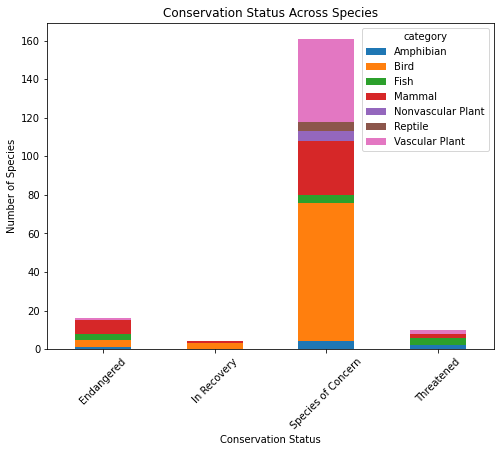

In [45]:
#Create a chart reflecting/using the data above
ax = Statusby_species.plot(kind = 'bar', figsize=(8,6), stacked=True)
plt.title('Conservation Status Across Species')
plt.xticks(rotation = 45)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

### Species and Consvervation Status

In [46]:
#Q2: Are certain species more likely to face endangerment than others?
#Q3 Is there a significant difference between species and their conservation status?
species['is_protected'] = species.conservation_status != 'No Intervention'
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected',index='category',values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Text(0, 0.5, 'Protection Status')

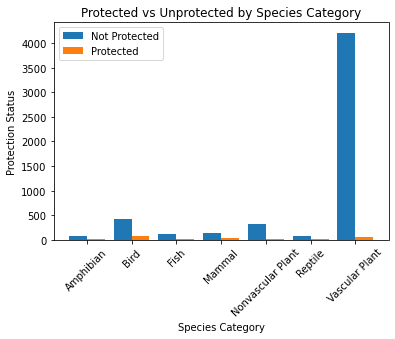

In [47]:
#ax = category_counts.plot(kind = 'bar', figsize=(8,6), stacked=True)
X_axis = np.arange(len(category_counts.category))
  
plt.bar(X_axis - 0.2, category_counts.not_protected, 0.4, label = 'Not Protected')
plt.bar(X_axis + 0.2, category_counts.protected, 0.4, label = 'Protected')
plt.legend()
plt.title('Protected vs Unprotected by Species Category')
plt.xticks(X_axis, category_counts.category, rotation = 45)
plt.xlabel("Species Category")
plt.ylabel('Protection Status')

In [48]:
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Text(0, 0.5, 'Percent Protected')

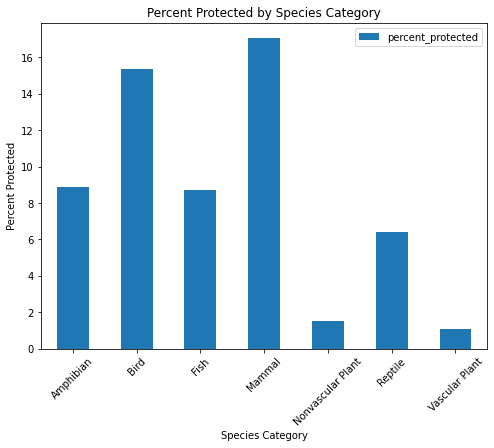

In [49]:
ax = category_counts.plot(kind = 'bar', x = 'category', y = 'percent_protected', figsize=(8,6))
plt.title('Percent Protected by Species Category')
plt.xticks(rotation = 45)
ax.set_xlabel("Species Category")
ax.set_ylabel("Percent Protected")

### Statistical Significance

(0.1617014831654557, 0.6875948096661336, 1, array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

Protection Needed Mammal vs. Bird

 p-value: 0.69, much higher than the statistical significance standard of 0.5. This indicates no statistically significant relationship between the consvervation status of birds and mammals.


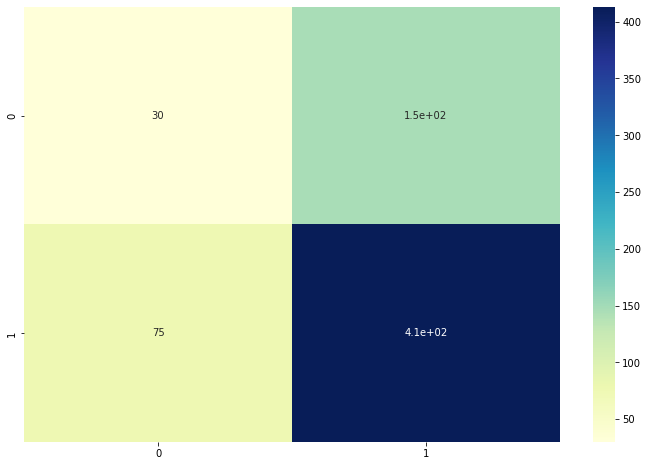

In [50]:
#Contigency table and chi square mammal vs bird
c_table1 = [[30,146], [75, 413]]
print(chi2_contingency(c_table1))
print('\nProtection Needed Mammal vs. Bird')

#Heatmap of c_table1 data
plt.figure(figsize=(12,8)) 
sns.heatmap(c_table1, annot=True, cmap="YlGnBu")
print('\n p-value: 0.69, much higher than the statistical significance standard of 0.5. This indicates no statistically significant relationship between the consvervation status of birds and mammals.')

(4.289183096203645, 0.03835559022969898, 1, array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

Protection Needed Mammal vs. Reptile

 p-value: 0.39, below the statistical significance standard of 0.5. This indicates a statistically significant relationship between the consvervation status of reptiles and mammals. Mammals have a much higher rate of conservation needed than reptiles.


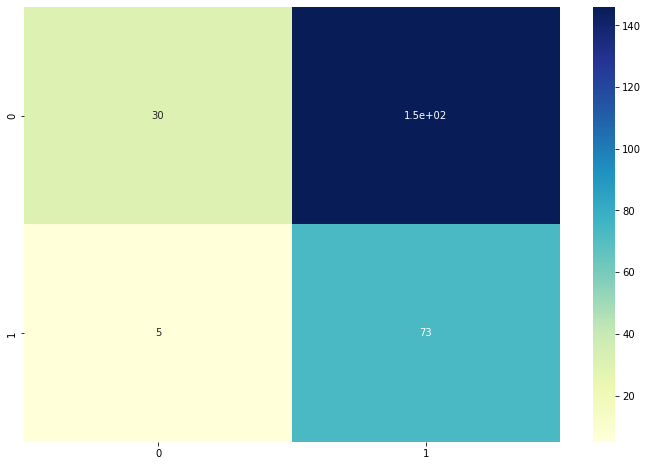

In [51]:
#Contigency table and chi square mammal vs reptile
c_table2 = [[30,146], [5, 73]]
print(chi2_contingency(c_table2))
print('\nProtection Needed Mammal vs. Reptile')

#Heatmap of c_table2 data
plt.figure(figsize=(12,8)) 
sns.heatmap(c_table2, annot=True, cmap="YlGnBu")
print('\n p-value: 0.39, below the statistical significance standard of 0.5. This indicates a statistically significant relationship between the consvervation status of reptiles and mammals. Mammals have a much higher rate of conservation needed than reptiles.')

### Animal Observation Distribution Across Parks

In [52]:
#Q4 What animal, if any, appears to be closest to facing exctinction at this time? What is it's distribution across parks?
#Q5 Is there an animal that is more prevelant than others? Does this prevelance differ across parks?

#Create function to remove punctuation in common_names column
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#Remove punctuation from common_names column 
animal_names = species.common_names.apply(remove_punctuations).str.split().tolist()
#print(animal_names)

#Remove duplicate names from each line item in animal_names list
clean_rows = []
for item in animal_names:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)   
print(clean_rows[:10])

#Replace current names in common_names column with the cleaned name data
species["common_names"] = clean_rows
print(species.head(10))

#Combine all items into one dimensional list for counts
all_names = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))
all_names[:10]

[['Gappers', 'RedBacked', 'Vole'], ['American', 'Bison'], ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'], ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'], ['Wapiti', 'Or', 'Elk'], ['WhiteTailed', 'Deer'], ['Feral', 'Hog', 'Wild', 'Pig'], ['Coyote'], ['Gray', 'Wolf'], ['Red', 'Wolf']]
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                       common_names conservation_status  \
0                        [Gappers, RedBacked, Vole]     No Intervention   
1                                 [American, Bison]     

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated']

In [53]:
#Calculate counts for each word
from collections import Counter
names_count = Counter(all_names)
#print(names_count)

pd.DataFrame.from_dict(names_count, orient = 'index', columns = ["Count"]).sort_values("Count", ascending = False).head(20)

,Count
Moss,285
Sedge,227
Common,185
Mountain,148
Grass,134
Western,114
American,106
Northern,100
White,95
Yellow,88


In [90]:
#Q4
#once seperated by name, seperate into endagered and concerned status by animal, then create chart with counts ** There are 191 rows with protected species before names seperated**
at_risk = species[species.is_protected == True]
at_risk = at_risk.explode("common_names") #use .explode() function to seperate items from list
#int(at_risk.head(10))
#rint(len(at_risk))   #474 rows protected species after seperate names**
risk_counts =at_risk.groupby(['common_names','conservation_status']).size().reset_index(name='count')
#isk_counts = risk_counts.sort_values('conservation_status', ascending=False)

print(risk_counts)


    common_names conservation_status  count
0     Alexanders  Species of Concern      1
1       American         In Recovery      1
2       American  Species of Concern      5
3         Ammons  Species of Concern      1
4    Appalachian  Species of Concern      2
..           ...                 ...    ...
360    Yellowfin          Threatened      1
361  Yellowstone  Species of Concern      1
362     Yosemite  Species of Concern      1
363     Yosemite          Threatened      1
364         Yuma  Species of Concern      1

[365 rows x 3 columns]


In [91]:
risk_names = Counter(risk_counts.common_names)
#print(names_count)

pd.DataFrame.from_dict(risk_names, orient = 'index', columns = ["count"]).sort_values("count", ascending = False).head(20)

#From the current dataset, there is not enough observational data to identify species with a statistically significat difference in risk. Need to determine if there is a better way to seperate and eval data for this question.

,count
California,3
Frog,3
Bat,3
Northern,3
Myotis,3
Falcon,2
Bighorn,2
Madtom,2
Darter,2
Smoky,2
